In [1]:
import pandas as pd

df = pd.read_csv('argsme1.csv', nrows=1000)


In [2]:
print('is null ? : \n', df.isnull().sum())
print('\n is duplicated :  ', df.duplicated().sum())
print('\ndata shape :', df.shape)

is null ? : 
 doc_id            0
conclusion        0
premises_texts    5
source_title      0
topic             0
acquisition       0
dtype: int64

 is duplicated :   0

data shape : (1000, 6)


In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.drop(
    columns=['premises', 'aspects', 'aspects_names', 'source_domain', 'source_text', 'source_text_conclusion_start',
             'source_text_conclusion_end', 'source_text_premise_start', 'source_text_premise_end', 'date', 'author',
             'source_id', 'source_next_argument_id', 'source_previous_argument_id', 'source_url',
                                                                                    'author_image_url',
             'author_organization', 'author_role', 'mode'], inplace=True)

In [14]:
# df["source_previous_argument_id"] = df["source_previous_argument_id"].fillna('')
# 
# df["source_next_argument_id"] = df["source_next_argument_id"].fillna('')

In [3]:
df = df.dropna(subset=['premises_texts'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   doc_id          995 non-null    object
 1   conclusion      995 non-null    object
 2   premises_texts  995 non-null    object
 3   source_title    995 non-null    object
 4   topic           995 non-null    object
 5   acquisition     995 non-null    object
dtypes: object(6)
memory usage: 54.4+ KB


In [12]:
def preprocess_text(text, work):
    if work == 1:
        cleaned_text = remove_urls(text, work)
        return cleaned_text
    return text


def preprocesse(df, text_fild, work):
    df['cleaned_premises_texts'] = df[text_fild].apply(lambda x: preprocess_text(str(x), work))
    return df


In [14]:
import nltk
from nltk import download
download('stopwords')
from nltk.corpus import stopwords

# Download the stop words corpus if not already downloaded
nltk.download('stopwords', quiet=True)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Thales
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def remove_urls(text):
    # Remove URLs
    url_pattern = r'(https?://|ftp://|tinyurl\.com/)\S+(\s|$)|(([a-zA-Z0-9-]+\.)+(com|org|net|gov|edu|co\.uk|co\.in|co\.[a-z]+))'
    cleaned_text = re.sub(url_pattern, ' ', text)
    return cleaned_text


def remove_website_domain(text):
    # Regular expression pattern to match website domains
    pattern = r'(https?:\/\/)?([a-zA-Z0-9-]+\.)+(com|org|net|gov|edu|co\.uk|co\.in|co\.[a-z]+)'

    # Replace matched website domains with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text


def remove_duplicated_char(text):
    cleaned_text = re.sub(r'(\w)\1+', r'\1', text)
    cleaned_text = re.sub(r'(.)\1+', r'\1', cleaned_text)

    return cleaned_text


def remove_non_english_chars(text):
    # Remove non-English characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    return cleaned_text


def remove_numbers(text):
    # Remove numbers
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text


def remove_p(text):
    cleaned_text = re.sub(r'(\w)(\W+)(\w)', lambda match: match.group(1) + ' ' + match.group(3).lower(), text)
    return cleaned_text


def remove_punctuation(text):
    cleaned_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~|\•|\)|\("""), '  ', text)
    return cleaned_text


def to_lowercase(text):
    return text.lower()


def remove_stopword(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stop words from the tokenized text
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    # Join the remaining words back into a string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


def stem_words(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [16]:
def preprocess_text(text, apply_remove_p=True):
    # Remove URLs
    cleaned_text = remove_urls(text)
    if apply_remove_p:
        cleaned_text = remove_p(cleaned_text)
    else:
        cleaned_text = text

    # Remove duplicated characters
    cleaned_text = remove_website_domain(cleaned_text)

    # Remove non-English characters
    cleaned_text = remove_non_english_chars(cleaned_text)

    # Convert to lowercase
    cleaned_text = to_lowercase(cleaned_text)

    # Remove punctuation
    cleaned_text = remove_punctuation(cleaned_text)

    # Remove stopwords
    cleaned_text = remove_stopword(cleaned_text)

    #lemmatization 
    cleaned_text = lemmatize_words(cleaned_text)

    #Remove numbers
    cleaned_text = remove_numbers(cleaned_text)

    return cleaned_text


In [17]:
df['premises_texts'] = df['premises_texts'].apply(preprocess_text, args=(True,))
df['conclusion'] = df['conclusion'].apply(preprocess_text, args=(True,))
df['source_title'] = df['source_title'].apply(preprocess_text, args=(False,))
#df['cleaned_source_url'] = df['source_url'].apply(preprocess_text)
df['topic'] = df['topic'].apply(preprocess_text, args=(True,))

In [18]:
df.to_csv('cleaned1000v4.csv', index=False)

In [31]:
df = pd.read_csv('cleaned1000v4.csv')

In [32]:
df = df.dropna(subset=['premises_texts'])

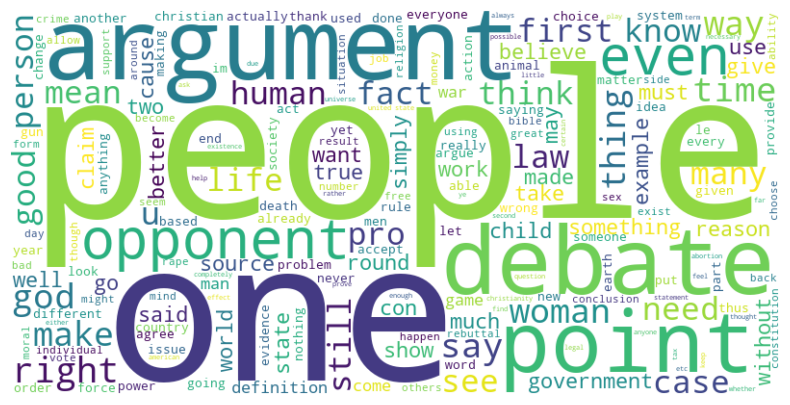

In [33]:
# wordcloud_from_csv.py
# Data representing

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Column name that contains the text data
text_column_name = 'premises_texts'


# Combine all text data into a single string
text = " ".join(df[text_column_name].astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [39]:
#Indexing

import re
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


def read_dataset(file_path, nrows=30):
    dataset = pd.read_csv(file_path, nrows=nrows)
    documents = [
        {
            'doc_id': row['doc_id'],
            'premises_texts': str(row['premises_texts']),
            'conclusion': str(row['conclusion'])
        }
        for _, row in dataset.iterrows()
    ]
    return documents


def preprocess_text(text):
    # Simple preprocessing to ensure text is cleaned
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Normalize white spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text


def plot_similarity_scores(doc_ids, scores):
    plt.figure(figsize=(10, 6))
    plt.bar(doc_ids, scores)
    plt.xlabel('Document ID')
    plt.ylabel('Similarity Score')
    plt.title('Similarity Scores for Documents')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# Main execution
file_path = "cleaned1000v4.csv"
document_list = read_dataset(file_path)


In [40]:
#Crete indexes

from collections import defaultdict


def build_inverted_index(documents):
    inverted_index = defaultdict(list)
    for doc in documents:
        doc_id = doc['doc_id']
        terms = preprocess_text(doc['premises_texts']).split()
        for term in terms:
            if doc_id not in inverted_index[term]:
                inverted_index[term].append(doc_id)
    return inverted_index


# بناء الفهرس المعكوس
inverted_index = build_inverted_index(document_list)

# طباعة الفهرس المعكوس لتفحصه
for term, doc_ids in inverted_index.items():
    print(f"{term}: {doc_ids}")


opponent: ['c67482ba-2019-04-18T13:32:05Z-00000-000', '4d3d4471-2019-04-18T11:45:01Z-00003-000', '3e59690a-2019-04-18T16:49:22Z-00004-000', '3e59690a-2019-04-18T16:49:22Z-00001-000', '3e59690a-2019-04-18T16:49:22Z-00002-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00000-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00001-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00002-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00003-000', 'f25e63e3-2019-04-18T13:24:15Z-00003-000']
forfeited: ['c67482ba-2019-04-18T13:32:05Z-00000-000', 'fbe6ad2-2019-04-18T11:12:36Z-00001-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00001-000', 'c3e9c4a6-2019-04-18T14:36:11Z-00002-000']
every: ['c67482ba-2019-04-18T13:32:05Z-00000-000', 'fbe6ad2-2019-04-18T11:12:36Z-00003-000', 'fbe6ad2-2019-04-18T11:12:36Z-00004-000', 'fbe6ad2-2019-04-18T11:12:36Z-00006-000']
round: ['c67482ba-2019-04-18T13:32:05Z-00000-000', 'fbe6ad2-2019-04-18T11:12:36Z-00006-000', '3e59690a-2019-04-18T16:49:22Z-00004-000', '3e59690a-2019-04-18T16:49:22Z-00001-000', 'c3e9c4a6-2019-04-18

In [36]:
#Most important terms
from sklearn.feature_extraction.text import TfidfVectorizer


def compute_tfidf(documents):
    corpus = [preprocess_text(doc['premises_texts']) for doc in documents]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names, vectorizer


# حساب TF-IDF للمستندات
tfidf_matrix, feature_names, vectorizer = compute_tfidf(document_list)

# طباعة مصطلحات الفهرسة الفعالة (بناءً على TF-IDF)
sorted_tfidf_index = tfidf_matrix.mean(axis=0).argsort().tolist()[0][::-1]
for idx in sorted_tfidf_index[:10]:  # عرض أهم 10 مصطلحات
    print(feature_names[idx])


debate
god
accept
alright
point
pro
argument
theme
person
round


In [37]:
#Documents query
def retrieve_documents(query, inverted_index):
    query_terms = preprocess_text(query).split()
    matched_docs = set(inverted_index[query_terms[0]]) if query_terms[0] in inverted_index else set()
    for term in query_terms[1:]:
        if term in inverted_index:
            matched_docs &= set(inverted_index[term])
        else:
            matched_docs = set()
    return list(matched_docs)


query = "god"
matched_docs = retrieve_documents(query, inverted_index)
print(f"Documents matching the query '{query}': {matched_docs}")


Documents matching the query 'god': ['fbe6ad2-2019-04-18T11:12:36Z-00006-000', 'fbe6ad2-2019-04-18T11:12:36Z-00005-000', 'fbe6ad2-2019-04-18T11:12:36Z-00001-000', 'fbe6ad2-2019-04-18T11:12:36Z-00003-000', 'fbe6ad2-2019-04-18T11:12:36Z-00004-000']


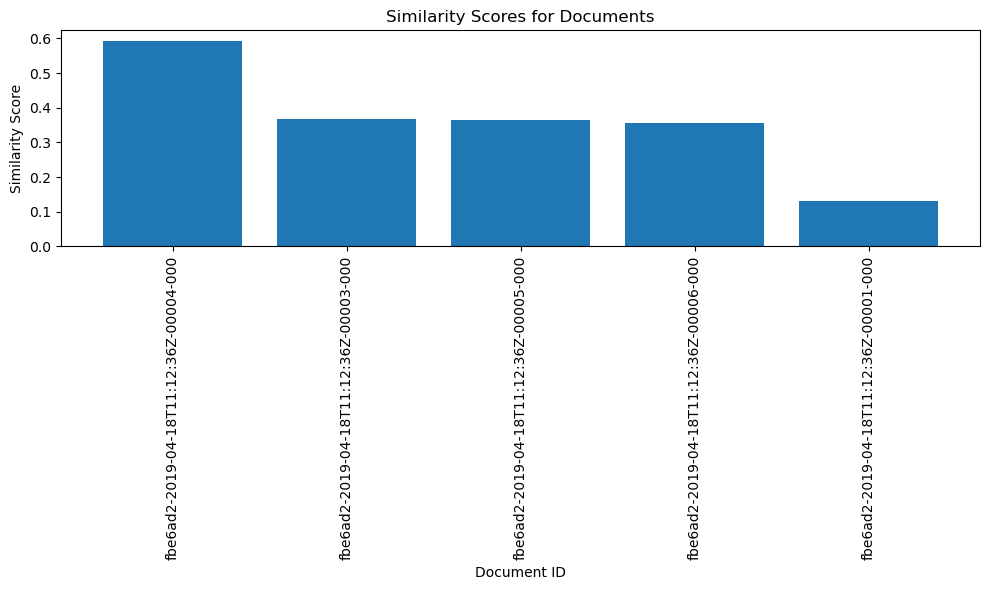

Top documents matching the query 'god':
Document ID: fbe6ad2-2019-04-18T11:12:36Z-00004-000, Score: 0.5938771179038395
Document ID: fbe6ad2-2019-04-18T11:12:36Z-00003-000, Score: 0.3673890995446569
Document ID: fbe6ad2-2019-04-18T11:12:36Z-00005-000, Score: 0.36469896093794324
Document ID: fbe6ad2-2019-04-18T11:12:36Z-00006-000, Score: 0.35715822953182197
Document ID: fbe6ad2-2019-04-18T11:12:36Z-00001-000, Score: 0.13165095806836444


In [38]:
#Query Processing

def process_query(query):
    query = preprocess_text(query)
    return query


def rank_documents(query, vectorizer, tfidf_matrix):
    query_vector = vectorizer.transform([query])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    return similarity_scores


# استعلام وترتيب المستندات
query = "god"
processed_query = process_query(query)
similarity_scores = rank_documents(processed_query, vectorizer, tfidf_matrix)

# الحصول على المستندات المطابقة
matching_docs = [(doc['doc_id'], score) for doc, score in zip(document_list, similarity_scores) if score > 0]
matching_docs.sort(key=lambda x: x[1], reverse=True)
doc_ids = [doc_id for doc_id, score in matching_docs]
scores = [score for doc_id, score in matching_docs]

# عرض درجات التشابه
plot_similarity_scores(doc_ids, scores)

# طباعة النتائج
print("Top documents matching the query '{}':".format(query))
for doc_id, score in matching_docs:
    print(f"Document ID: {doc_id}, Score: {score}")
